In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df.info() # Algumas info gerais do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age_of_patient_at_time_of_operation         306 non-null    int64
 1   Patients_year_of_operation                  306 non-null    int64
 2   Number_of_positive_axillary_nodes_detected  306 non-null    int64
 3   Survival_status                             306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Existem linhas vazias no dataset?

In [4]:
df.isnull().sum()

Age_of_patient_at_time_of_operation           0
Patients_year_of_operation                    0
Number_of_positive_axillary_nodes_detected    0
Survival_status                               0
dtype: int64

In [5]:
df.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Renomeando colunas:

- Age_of_patient_at_time_of_operation = Age
- Patients_year_of_operation = Year
- Number_of_positive_axillary_nodes_detected = Nodes
- Survival_status = Survival


In [6]:
df.rename(columns={'Age_of_patient_at_time_of_operation':'Age',
'Patients_year_of_operation':'Year',
'Number_of_positive_axillary_nodes_detected':'Nodes',
'Survival_status':'Survival'}, inplace=True)

#### Substituindo o status:
#### 2 (morte) -> 0 (morte) 
#### o que vai facilitar futuros cálculos

In [7]:
df.Survival.replace(to_replace=2, value=0, inplace=True)

#### Qual a quantidade de sobreviventes?

In [8]:
df.Survival.value_counts()

Survival
1    225
0     81
Name: count, dtype: int64

In [9]:
df.Survival.value_counts(1) # Traz em porcentagem

Survival
1    0.735294
0    0.264706
Name: proportion, dtype: float64

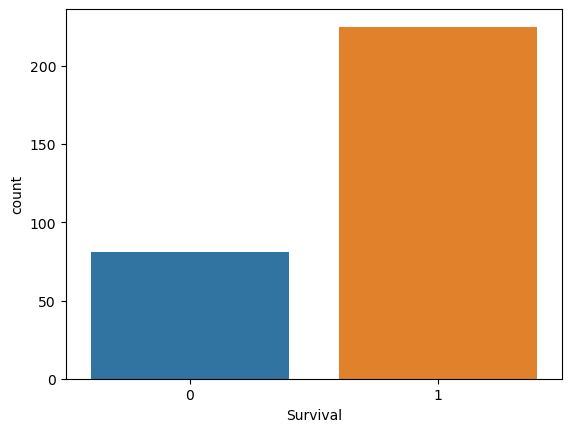

In [10]:
sns.countplot(data=df, x='Survival');

#### Algumas estatísticas básicas para a coluna 'Age'

In [11]:
df.Age.describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

#### Dividindo as pessoas em grupos de idade de 5 em 5, percebemos que o maior número e pessoas operadas está entre 50 e 55 anos

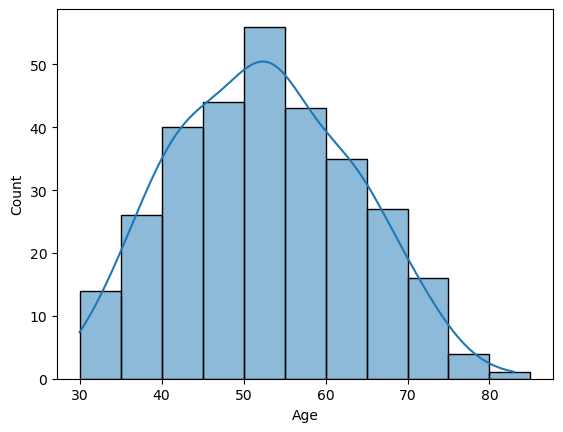

In [12]:
sns.histplot(x='Age', data=df, binwidth=5, kde=True);

####  Entendendo a sobrevida de acordo com a idade, vemos que té 50 anos apriximadamente a taxa de sobrevivência é maior que de morte

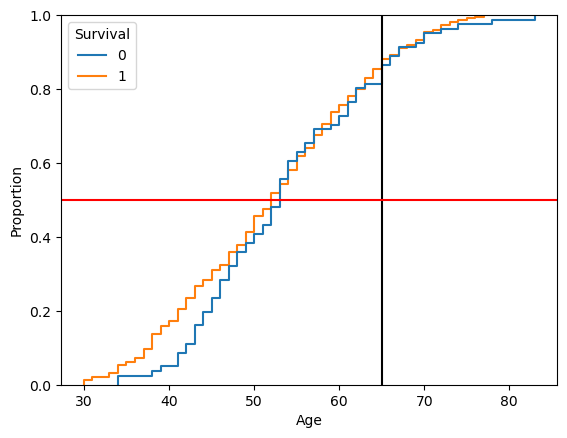

In [13]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(65,c='black')
plt.axhline(0.5,c='red');

#### Quais os anos com maior número de pessoas que realizaram operação?

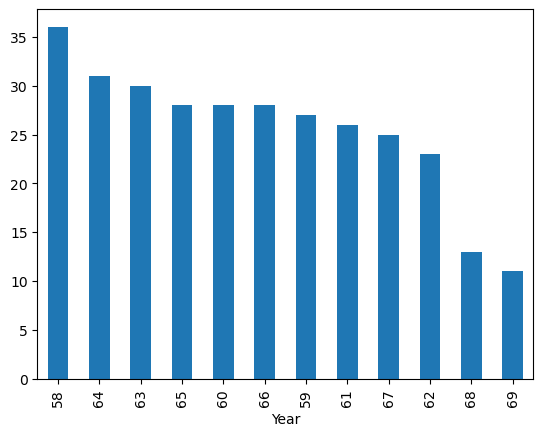

In [14]:
df.Year.value_counts().plot(kind='bar');

#### Estatísicas básicas para número de nódulos

In [15]:
df.Nodes.describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

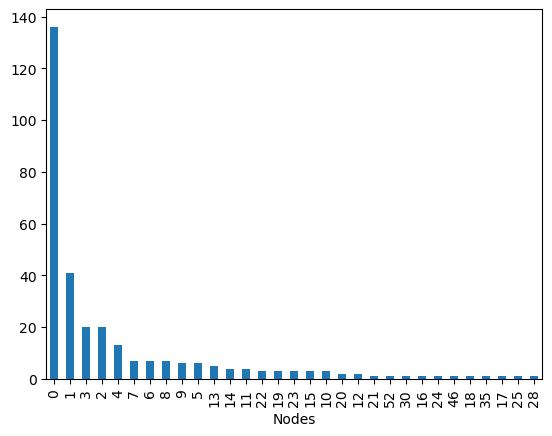

In [16]:
df.Nodes.value_counts().plot(kind='bar')

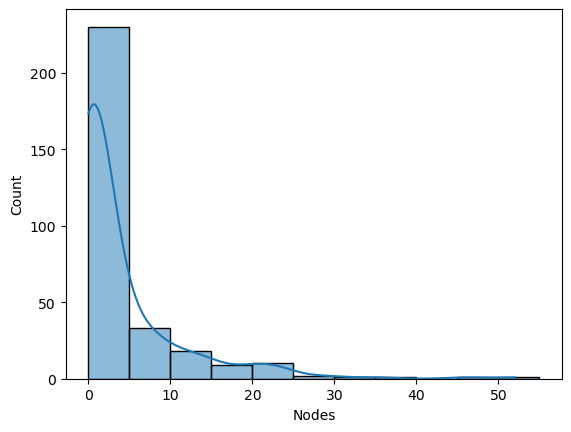

In [17]:
sns.histplot(x='Nodes', data=df, binwidth=5, kde=True);

<Axes: xlabel='Survival', ylabel='Age'>

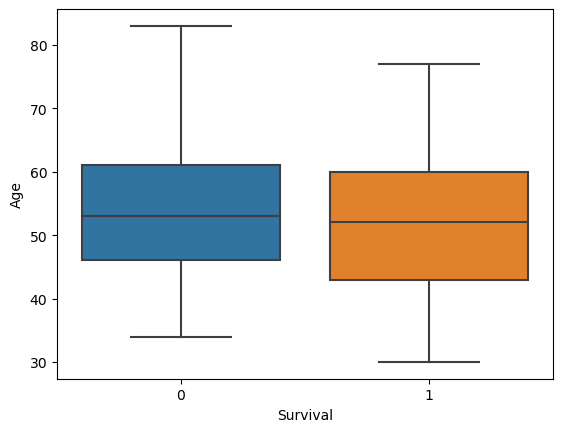

In [18]:
sns.boxplot(x='Survival', y='Age', data=df)

- Percebemos que a mediana da idade de pessoas que sobrevivem e que não é quase igual
- O que muda é que pessoas que sobrevivem em média tem uma idade menor que pessoas que não sobrevivem, mas ainda sim não é um fator determinante
- Pessoas com idade>77 viverão menos de 5 anos de acordo com esse boxplot

C:\Users\mau_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


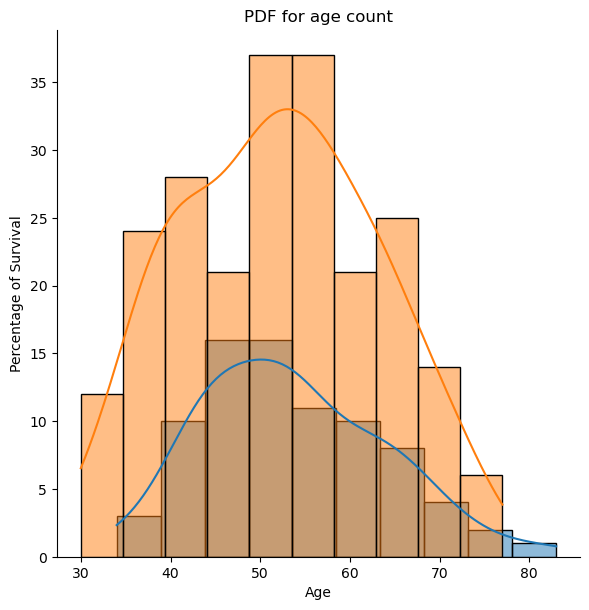

In [19]:
sns.FacetGrid(df, hue='Survival', height=6).map(sns.histplot, 'Age', bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Percentage of Survival')
plt.title('PDF for age count', size=12);

In [22]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
52    10
50    10
38     9
54     9
55     8
57     8
49     8
47     8
63     7
41     7
42     7
43     7
59     7
58     7
61     6
45     6
37     6
65     6
53     5
56     5
34     5
39     5
70     5
64     5
67     4
48     4
60     4
44     4
62     4
51     4
69     3
72     3
66     3
30     3
46     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
71     1
74     1
75     1
76     1
77     1
78     0
83     0
Name: Survival, dtype: int64

In [23]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
41    10
38    10
65    10
49    10
42     9
45     9
61     9
59     8
63     8
46     7
70     7
44     7
34     7
48     7
62     7
58     7
56     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
40     3
30     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

<Axes: xlabel='Survival', ylabel='Nodes'>

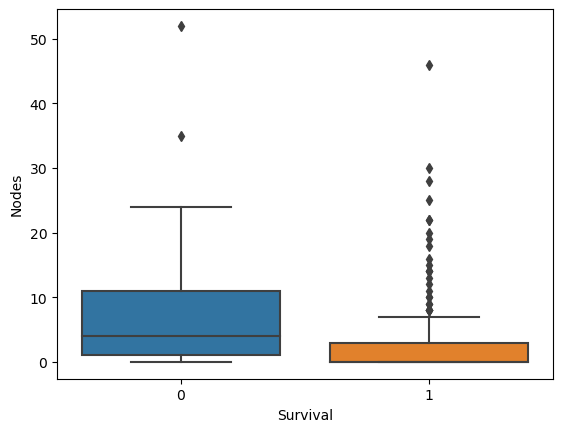

In [24]:
sns.boxplot(x='Survival', y='Nodes', data=df)